In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('forestfire1s.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,satellite,instrument,version
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,Aqua,MODIS,6.1NRT
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1,Terra,MODIS,6.1NRT
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1,Terra,MODIS,6.1NRT
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,Terra,MODIS,6.1NRT
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1,Terra,MODIS,6.1NRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,Terra,MODIS,6.1NRT
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,Terra,MODIS,6.1NRT
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0,Terra,MODIS,6.1NRT
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,Terra,MODIS,6.1NRT


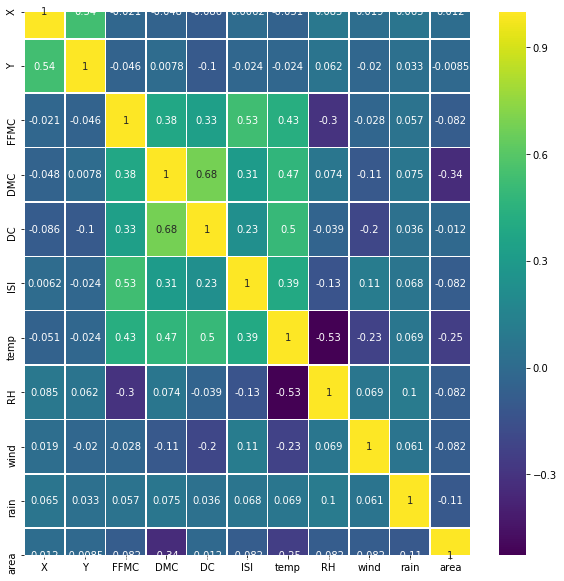

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [5]:
#Data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
X             517 non-null int64
Y             517 non-null int64
month         517 non-null object
day           517 non-null object
FFMC          517 non-null float64
DMC           517 non-null float64
DC            517 non-null float64
ISI           517 non-null float64
temp          517 non-null float64
RH            517 non-null int64
wind          517 non-null float64
rain          517 non-null float64
area          517 non-null int64
satellite     517 non-null object
instrument    517 non-null object
version       517 non-null object
dtypes: float64(7), int64(4), object(5)
memory usage: 64.8+ KB


In [6]:
data = data.drop(['satellite','instrument',], axis = 1 )
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,version
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,6.1NRT
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1,6.1NRT
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1,6.1NRT
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,6.1NRT
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1,6.1NRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,6.1NRT
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,6.1NRT
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0,6.1NRT
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,6.1NRT


In [7]:
#rhfufhrhregiergr
data = data.drop(['version'], axis = 1 )
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0


In [8]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [22]:
def preprocess_inputs(df, task='regression'):
    df = df.copy()
    
    # Ordinal encode month and day columns
    df = ordinal_encode(
        df,
        column='month',
        ordering=[
            'jan',
            'feb',
            'mar',
            'apr',
            'may',
            'jun',
            'jul',
            'aug',
            'sep',
            'oct',
            'nov',
            'dec'
        ]
    )
    df = ordinal_encode(
        df,
        column='day',
        ordering=[
            'sun',
            'mon',
            'tue',
            'wed',
            'thu',
            'fri',
            'sat'
        ]
    )
    
    # Split df into X and y
    if task == 'regression':
        y = df['area']
    elif task == 'classification':
        y = df['area'].apply(lambda x: 1 if x > 0 else 0)
    
    X = df.drop('area', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale feature data (X)
   
    
    return X_train, X_test, y_train, y_test
    
   

In [23]:
#Regression
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='regression')


In [ ]:
X_train

In [14]:
y_train

13     1
61     1
453    0
39     1
373    1
      ..
129    1
144    1
72     1
235    1
37     1
Name: area, Length: 361, dtype: int64

In [15]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

print("Linear Regression R^2: {:.5f}".format(lin_reg_model.score(X_test, y_test)))

Linear Regression R^2: 0.20396


In [16]:
X_test

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-1.116216,-1.839756,0.223722,-0.497519,0.253542,0.686627,0.459417,1.119473,0.485678,0.804281,-0.473059,-0.093528
1,0.609497,0.549280,0.223722,1.393052,-0.051340,-0.183226,0.323590,-0.008972,-0.702942,0.993349,1.076825,-0.093528
2,-0.253360,1.345625,0.653317,0.447767,0.510285,-0.433094,0.567279,1.871770,-0.217449,-0.078036,-0.473059,-0.093528
3,-0.684788,-0.247066,0.653317,0.920409,0.446099,0.508596,0.681933,1.035885,-0.050038,0.363122,-0.186043,-0.093528
4,1.040925,-0.247066,0.653317,-0.024876,-0.067386,-0.401861,0.769022,-0.573195,-0.585754,0.867304,0.330585,-0.093528
...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.609497,1.345625,0.223722,1.393052,0.879353,0.864658,0.398694,1.056782,1.992379,-0.834308,0.560197,-0.093528
152,-0.253360,-0.247066,0.653317,-1.442804,-0.131572,-0.290982,0.643981,-0.865755,-0.183967,1.308462,-1.506315,-0.093528
153,-0.684788,-0.247066,0.653317,-1.442804,0.301682,0.241549,0.549302,-0.092561,0.602866,-0.078036,0.847213,-0.093528
154,0.609497,0.549280,-1.924250,0.447767,-0.901800,-1.412265,-1.950307,-1.241904,-2.276607,1.686598,0.330585,-0.093528


In [17]:
y_test

270    1
90     1
133    1
221    1
224    1
      ..
494    0
95     1
122    1
165    1
23     1
Name: area, Length: 156, dtype: int64

In [14]:
#Classification
X_train, X_test, y_train, y_test = preprocess_inputs(data, task='classification')
X_train

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.699712,0.570175,0.232345,1.400065,0.500765,0.493191,0.209089,2.421661,-0.203002,0.508938,1.039090,-0.108047
1,-0.264500,0.570175,0.660730,-0.009099,0.400596,0.397001,0.628197,0.062626,0.097739,-1.538986,-1.525858,-0.108047
2,-0.699712,-0.241833,0.232345,0.460622,0.417291,-0.517601,-0.298294,-0.256163,0.131154,-0.483995,-0.499879,-0.108047
3,0.605926,0.570175,-2.337968,-0.478820,-2.571092,-1.635622,-2.089247,-1.488812,-2.375015,2.370688,1.324085,-0.108047
4,-0.264500,-0.241833,0.232345,-0.478820,0.717799,0.002776,0.419439,1.720326,-0.370080,0.633055,0.811095,-0.108047
...,...,...,...,...,...,...,...,...,...,...,...,...
408,-1.134925,0.570175,1.089116,-1.418262,0.350512,-0.971748,0.597182,-0.022385,-0.570573,-0.546053,-1.753853,-0.108047
409,-1.134925,0.570175,0.232345,-0.009099,0.834663,-0.129684,-0.112598,0.912728,0.832882,-0.732228,0.811095,-0.108047
410,0.170713,-0.241833,-1.909583,0.930344,0.200258,-1.179898,-1.845496,0.020120,-0.537158,-1.166636,1.324085,-0.108047
411,1.476351,1.382183,0.232345,-1.418262,0.150173,0.540498,0.237719,0.360162,0.131154,-0.173703,1.039090,-0.108047


In [18]:
y_train.head(5)

13     1
61     1
453    0
39     1
373    1
Name: area, dtype: int64

In [16]:
lin_clf_model = LogisticRegression()
lin_clf_model.fit(X_train, y_train)

print("Linear Classification Accuracy: {:.2f}%".format(lin_clf_model.score(X_test, y_test) * 100))

Linear Classification Accuracy: 83.65%


In [ ]:
 scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)